**A. TSP	–	Travelling	salesman	problem	–	Problema	del	vendedor	viajante**

Dada	una	lista	de	ubicaciones	y	las	distancias	entre	cada	par	de	ellas,	¿cuál	es	la	ruta
más	corta	posible	que	visita	cada	ubicación	exactamente	una	vez	y	al	finalizar	regresa
a	la	ciudad	origen	formando	un	ciclo	cerrado?

Total distance of best route: 1804.7199293331653


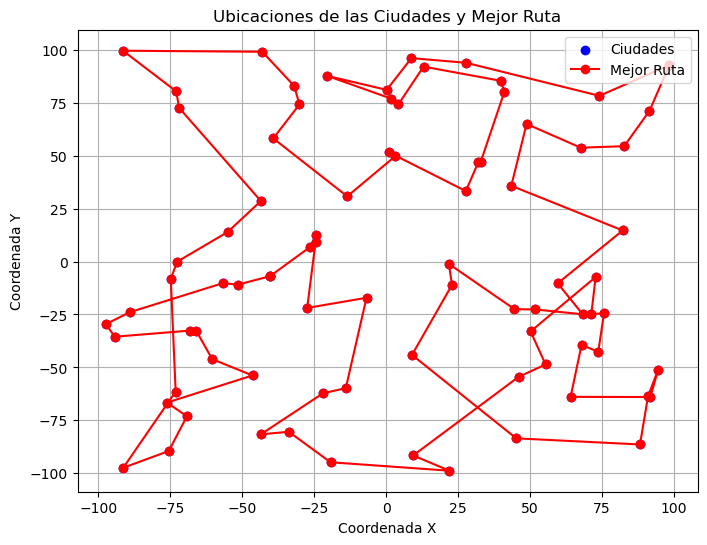

In [1]:
from typing import List, Tuple

import random
import string
import math
import itertools

from matplotlib import pyplot as plt

class GeneticTSP:
    def __init__(self, cities, distances, population_size=100, mutation_rate=0.01):
        self.cities = cities
        self.distances = distances
        self.population_size = population_size
        self.mutation_rate = mutation_rate

    def _create_individual(self):
        """Creates a random route (individual)."""
        return random.sample(list(self.cities.keys()), len(self.cities))

    def _create_population(self):
        """Creates an initial population of random routes."""
        return [self._create_individual() for _ in range(self.population_size)]

    def _calculate_fitness(self, individual):
        """Calculates the fitness of a route (total distance)."""
        distance = 0
        for i in range(len(individual) - 1):
            distance += self.distances[(individual[i], individual[i + 1])]
        distance += self.distances[(individual[-1], individual[0])]  # Return to start
        return 1 / distance  # Fitness is inverse of distance

    def _select_parents(self, population):
        """Selects two parents using tournament selection."""
        tournament_size = 5
        parent1 = max(random.choices(population, k=tournament_size), key=self._calculate_fitness)
        parent2 = max(random.choices(population, k=tournament_size), key=self._calculate_fitness)
        return parent1, parent2

    def _crossover(self, parent1, parent2):
        """Performs ordered crossover to create offspring."""
        start = random.randint(0, len(parent1) - 1)
        end = random.randint(start + 1, len(parent1))
        offspring = parent1[start:end]
        for city in parent2:
            if city not in offspring:
                offspring.append(city)
        return offspring

    def _mutate(self, individual):
        """Introduces random mutations (swapping cities)."""
        if random.random() < self.mutation_rate:
            i, j = random.sample(range(len(individual)), 2)
            individual[i], individual[j] = individual[j], individual[i]
        return individual

    def evolve(self, generations=1000):
        """Runs the genetic algorithm for the specified number of generations."""
        population = self._create_population()
        best_individual = max(population, key=self._calculate_fitness)
        best_fitness = self._calculate_fitness(best_individual)

        for _ in range(generations):
            new_population = []
            for _ in range(self.population_size):
                parent1, parent2 = self._select_parents(population)
                offspring = self._crossover(parent1, parent2)
                offspring = self._mutate(offspring)
                new_population.append(offspring)

            population = new_population
            current_best = max(population, key=self._calculate_fitness)
            current_fitness = self._calculate_fitness(current_best)

            if current_fitness > best_fitness:
                best_fitness = current_fitness
                best_individual = current_best

        return best_individual, 1 / best_fitness 

def generar_ciudades(n_cities: int, seed: int = 123):
    random.seed(seed)  # This fixes the seed for reproducibility
    cities = {}
    for i in range(n_cities):
        ciudad = f"{random.choice(string.ascii_uppercase)}{random.randint(0,9)}"
        x = round(random.uniform(-100, 100) ,1) # Coordenada x aleatoria entre -100 y 100
        y = round(random.uniform(-100, 100), 1)  # Coordenada y aleatoria entre -100 y 100
        cities[ciudad] = (x, y)
    return cities

def calcular_distancia(ciudad1, ciudad2):
    x1, y1 = ciudad1
    x2, y2 = ciudad2
    distancia = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distancia

def generar_distancias(ciudades):
    distancias = {}
    for ciudad1, coord1 in ciudades.items():
        for ciudad2, coord2 in ciudades.items():
            if ciudad1 != ciudad2:
                distancia = calcular_distancia(coord1, coord2)
                distancias[(ciudad1, ciudad2)] = distancia
    return distancias

def generar_ciudades_con_distancias(n_cities: int):
    ciudades = generar_ciudades(n_cities)
    distancias = generar_distancias(ciudades)
    return ciudades, distancias

def plotear_ruta(ciudades, ruta, mostrar_anotaciones=True):
    # Extraer coordenadas de las ciudades
    coordenadas_x = [ciudades[ciudad][0] for ciudad in ruta]
    coordenadas_y = [ciudades[ciudad][1] for ciudad in ruta]

    # Agregar la primera ciudad al final para cerrar el ciclo
    coordenadas_x.append(coordenadas_x[0])
    coordenadas_y.append(coordenadas_y[0])

    # Trama de las ubicaciones de las ciudades
    plt.figure(figsize=(8, 6))
    plt.scatter(coordenadas_x, coordenadas_y, color='blue', label='Ciudades')

    # Trama del mejor camino encontrado
    plt.plot(coordenadas_x, coordenadas_y, linestyle='-', marker='o', color='red', label='Mejor Ruta')

    if mostrar_anotaciones:
        # Anotar las letras de las ciudades
        for i, ciudad in enumerate(ruta):
            plt.text(coordenadas_x[i], coordenadas_y[i], ciudad)

    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title('Ubicaciones de las Ciudades y Mejor Ruta')
    plt.legend()
    plt.grid(True)
    plt.show()


class TSP:
    def __init__(self, ciudades, distancias):
        self.ciudades = ciudades
        self.distancias = distancias

    def encontrar_la_ruta_mas_corta(self, approach="brute_force"):
        if approach == "brute_force":
            return self._brute_force_tsp()
        elif approach == "dynamic_programming":
            return self._dynamic_programming_tsp()
        else:
            raise ValueError("Invalid approach. Choose 'brute_force' or 'dynamic_programming'.")

    def _brute_force_tsp(self) -> Tuple[List[str], float]:
        """Solves TSP using brute force (for a small number of cities)."""
        shortest_route = None
        min_distance = float('inf')

        for route in itertools.permutations(self.ciudades.keys()):
            distance = self._calculate_route_distance(route)
            if distance < min_distance:
                min_distance = distance
                shortest_route = list(route)

        return shortest_route, min_distance


    def _calculate_route_distance(self, route):
        """Calculates the total distance of a route."""
        distance = 0
        for i in range(len(route) - 1):
            distance += self.distancias[(route[i], route[i + 1])]
        distance += self.distancias[(route[-1], route[0])]  # Return to the starting city
        return distance

    def plotear_resultado(self, ruta: List[str], mostrar_anotaciones: bool = True):
        plotear_ruta(self.ciudades, ruta, mostrar_anotaciones)

# ... (study_case_1 and study_case_2 functions) ...

def study_case_1():
    n_cities = 10
    ciudades, distancias = generar_ciudades_con_distancias(n_cities)
    tsp = TSP(ciudades, distancias)
    ruta, distance = tsp.encontrar_la_ruta_mas_corta(approach="brute_force") 
    print(f"Shortest route: {ruta}")
    print(f"Total distance: {distance}")
    tsp.plotear_resultado(ruta)

def study_case_2():
    n_cities = 100
    ciudades, distancias = generar_ciudades_con_distancias(n_cities)
    tsp_solver = GeneticTSP(ciudades, distancias)
    best_route, total_distance = tsp_solver.evolve(generations=2500)
    print(f"Total distance of best route: {total_distance}")
    plotear_ruta(ciudades, best_route, mostrar_anotaciones=False) 


if __name__ == "__main__":
    # Solve the TSP problem
    study_case_2()